In [1]:
import numpy as np

from utils import get_logflk_config, run_toys, return_best_chi2dof, candidate_sigma, plot_ref_data

In [3]:
# to estimate flk_sigma from data use candidate_sigma on a reference sample 
# for example
tune_ref_sample = np.random.default_rng(0).exponential(scale=1/8, size=(10000,1))
candidate_sigma(tune_ref_sample)

0.3

In [5]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

# these hyperparameters are for fast training
M = 1000
lam = 1e-6
flk_sigma = 0.3

flk_config = get_logflk_config(M,flk_sigma,[lam],weight=weight,iter=[1000000],seed=None,cpu=False) # seed is set inside learn_t function

# null hypothesis
NS=0 # expected NP component
run_toys("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=0, df=9.6)

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2018, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000


t = 4.3409746275769265
Time = 0.86 sec
	
[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2001, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 5.7775645638336535
Time = 0.85 sec
	
[--] Toy 2: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1968, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 2.373184812108242
Time = 0.58 sec
	
[--] Toy 3: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1926, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 7.789213077278163
Time = 0.83 sec
	
[--] Toy 4: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2094, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 7.166518070283729
Time = 1.12 sec
	
[--] Toy 5: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2043, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 1.6490936219299925
Time = 0.85 sec
	
[--] Toy 6: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2005, 1)
Iteration 0 - penalty 1.0

In [2]:
# to find the degree of freedom of the chi2 for the reference experiments, use the function return_best_chi2dof in utils.py
# for example (change to appropriate path)
null_hypothesis = np.loadtxt("./runs/16Oct24_173205/reference/t.txt", delimiter=',')
chi2_dof = return_best_chi2dof(null_hypothesis[:,1])

[--] Toy 105: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1940, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 14.896247124096888
Time = 0.86 sec
	


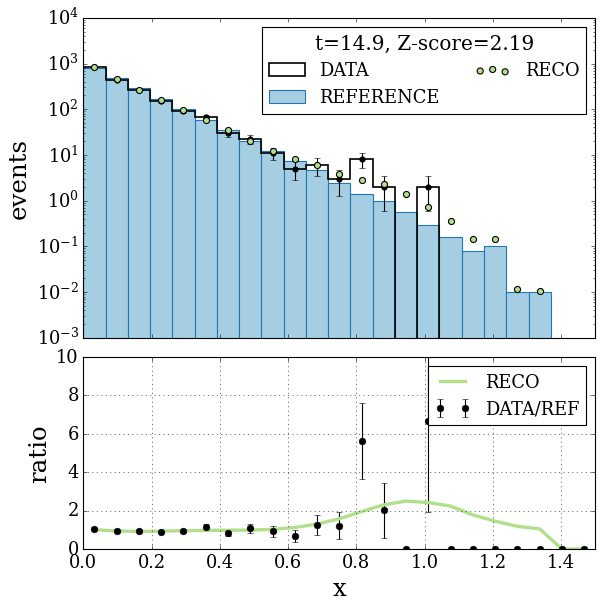

[--] Toy 108: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2059, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 9.49189697356178
Time = 0.85 sec
	


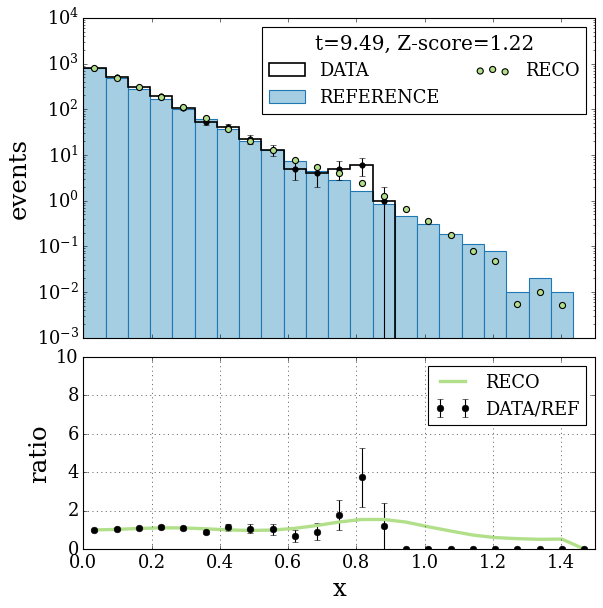

[--] Toy 109: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2017, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 19.83804048763097
Time = 1.0 sec
	


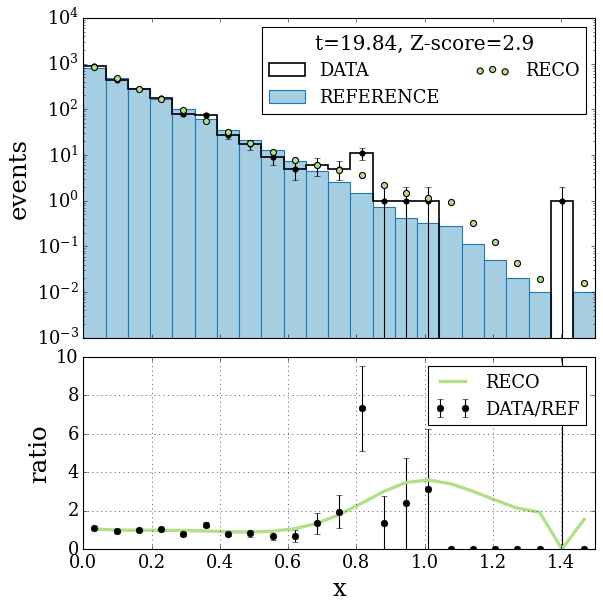

[--] Toy 111: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1958, 1)
Iteration 0 - penalty 1.000000e-06 - sub-iterations 1000000
t = 22.990051451838553
Time = 1.22 sec
	


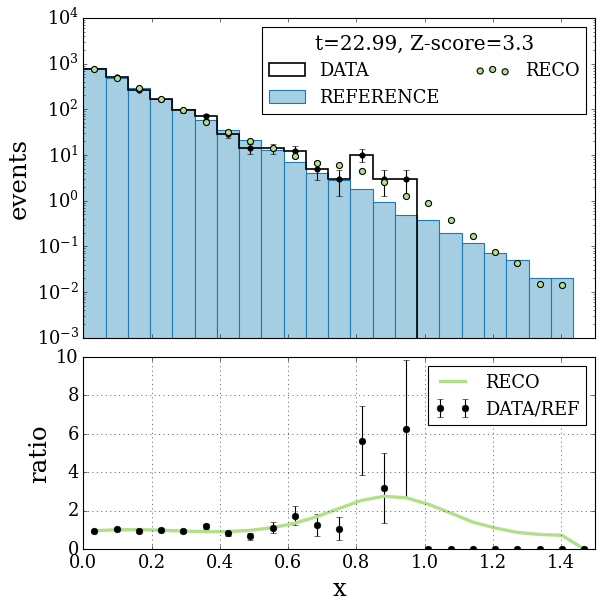

In [16]:
# alternative hypothesis with NP1 signal
NS=10 # expected NP component
run_toys("NP1", "./NP1/", N_0, N0, NS, flk_config, toys=[105,108,109,111], plots_freq=1, df=chi2_dof)

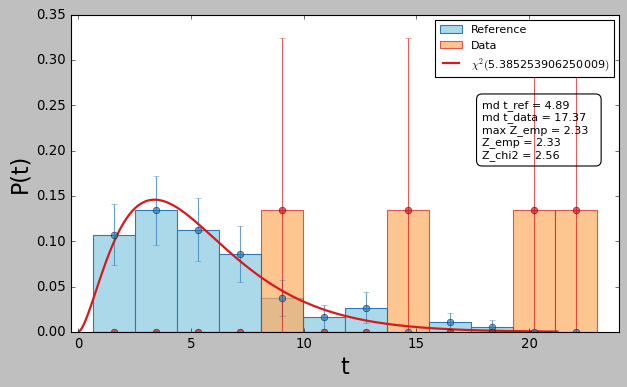

In [4]:
# in utils.py you additional functions can be found to plot the test statistics
# for example
alt_hypothesis = np.loadtxt("./runs/16Oct24_173720/NP1/t.txt", delimiter=',')
plot_ref_data(null_hypothesis[:,1], alt_hypothesis[:,1], dof=chi2_dof, bins=12)